In [1]:
from google.colab import files
uploaded = files.upload()

Saving STUDENTPERFORMANCE.csv to STUDENTPERFORMANCE.csv


In [3]:
import pandas as pd

df = pd.read_csv("STUDENTPERFORMANCE.csv")
df.head()

,MATH_SCORE,READING_SCORE,WRITING_SCORE,PLACEMENT_SCORE,CLUB_JOIN_DATE,PLACEMENT_OFFER_COUNT
0,62.0,94.0,65.0,93.0,2020.0,1.0
1,78.0,91.0,75.0,83.0,2020.0,4.0
2,73.0,85.0,76.0,80.0,2018.0,2.0
3,75.0,83.0,65.0,78.0,2018.0,2.0
4,76.0,92.0,80.0,95.0,2021.0,5.0


In [4]:
df.isnull().sum()

,0
MATH_SCORE,1
READING_SCORE,6
WRITING_SCORE,11
PLACEMENT_SCORE,7
CLUB_JOIN_DATE,6
PLACEMENT_OFFER_COUNT,27


In [6]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-754084223.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [7]:
df.isnull().sum()

,0
MATH_SCORE,0
READING_SCORE,0
WRITING_SCORE,0
PLACEMENT_SCORE,0
CLUB_JOIN_DATE,0
PLACEMENT_OFFER_COUNT,0


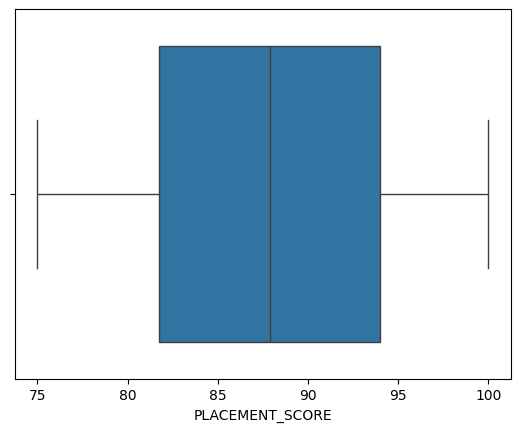

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["PLACEMENT_SCORE"])
plt.show()

In [11]:
import numpy as np

df["Placement_Score_Log"] = np.log(df["PLACEMENT_SCORE"])
df.head()

,MATH_SCORE,READING_SCORE,WRITING_SCORE,PLACEMENT_SCORE,CLUB_JOIN_DATE,PLACEMENT_OFFER_COUNT,Placement_Score_Log
0,62.0,94.0,65.0,93.0,2020.0,1.0,4.532599
1,78.0,91.0,75.0,83.0,2020.0,4.0,4.418841
2,73.0,85.0,76.0,80.0,2018.0,2.0,4.382027
3,75.0,83.0,65.0,78.0,2018.0,2.0,4.356709
4,76.0,92.0,80.0,95.0,2021.0,5.0,4.553877


In [13]:
df.to_excel("Final_StudentsPerformance.xlsx", index=False)

In [16]:
# Check for missing values
print(df.isnull().sum())

# Example: Fill missing Math scores with the average score
df['MATH_SCORE'] = df['MATH_SCORE'].fillna(df['MATH_SCORE'].mean())

# Example: Fill missing Placement scores with the median
df['PLACEMENT_SCORE'] = df['PLACEMENT_SCORE'].fillna(df['PLACEMENT_SCORE'].median())

MATH_SCORE               0
READING_SCORE            0
WRITING_SCORE            0
PLACEMENT_SCORE          0
CLUB_JOIN_DATE           0
PLACEMENT_OFFER_COUNT    0
Placement_Score_Log      0
dtype: int64


In [19]:
# Detect and handle outliers using the Interquartile Range (IQR) method
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Replace outliers with the median value
    data[column] = np.where((data[column] < lower_limit) | (data[column] > upper_limit),
                            data[column].median(), data[column])
    return data

# Apply to your numeric columns
for col in ['MATH_SCORE', 'READING_SCORE', 'WRITING_SCORE', 'PLACEMENT_SCORE']:
    df = handle_outliers(df, col)

In [21]:
# Applying log transformation to the placement score
df['transformed_placement_score'] = np.log1p(df['PLACEMENT_SCORE'])

print("Data transformation complete.")
df[['PLACEMENT_SCORE', 'transformed_placement_score']].head()

Data transformation complete.


,PLACEMENT_SCORE,transformed_placement_score
0,93.0,4.543295
1,83.0,4.430817
2,80.0,4.394449
3,78.0,4.369448
4,95.0,4.564348
